In [1]:
%load_ext autoreload
%autoreload 2

# Standard Imports
import pandas as pd
import numpy as np

import zipfile
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [131]:
import itertools

# Models
from sklearn.linear_model import LogisticRegression

# Transformers
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Pipelines
from imblearn.pipeline import Pipeline, make_pipeline

# SMOTE
from imblearn.over_sampling import SMOTE

# Standard Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('~/Downloads/bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [5]:
df['churn']=df['churn'].astype(int)

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [8]:
df.dtypes.value_counts()

int64      9
float64    8
object     4
dtype: int64

In [12]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [8]:
#data = pd.get_dummies(df, columns=['area code'])
#data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

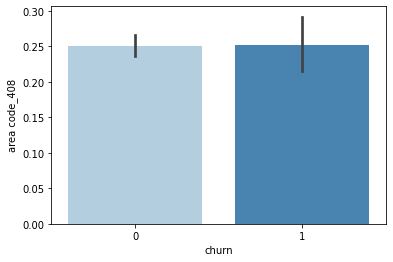

In [61]:
fig = sns.barplot(data['churn'], data['area code_408'], palette="Blues")


In [ ]:
fig = sns.barplot(df['area code'], df['churn'], palette="Blues")

In [36]:
area_code_obj = ['408', '415', '510']
area_code_obj

In [46]:
#x = {}
#x['area_code'] = df.loc[df['area code'].isin(area_code_obj)]['type']

In [57]:
#fg1, axs = plt.subplots(nrows = 1, figsize = (13,13))

#sns.barplot(x = df['area_code'], y = df['total intl charge'], hue = df['churn'], ax = axs[0], palette = 'Greens', alpha = 0.8)
#sns.barplot(x = data['area code_415'], y = data['churn'], ax = axs[1], palette = 'Blues', alpha = 0.8)
#sns.barplot(x = data['area code_510'], y = data['churn'], ax = axs[2], palette = 'Purples', alpha = 0.8)

#axs[0].set_xticklabels(['area code 408', '1'])
#axs[1].set_xticklabels(['Ages 24 to 22', 'Ages 21 to 19', 'Ages 18 to 16'])
#axs[2].set_xticklabels(['Black Ethnicity', 'Latino or Hispanic Ethnicity', 'White Ethnicity', 'Other Ethnicity'])

In [58]:
df['total intl calls'].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
17      1
20      1
Name: total intl calls, dtype: int64

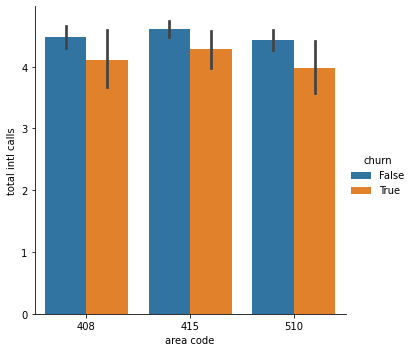

In [56]:
g = sns.catplot(x="area code", y="total intl calls",
                hue="churn", 
                data=df, kind="bar");

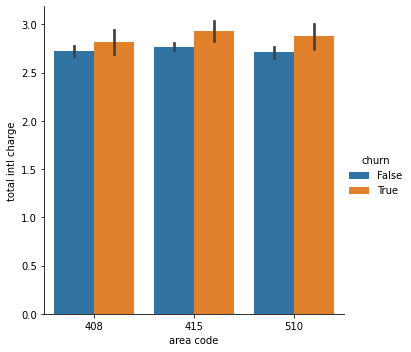

In [60]:
g = sns.catplot(x="area code", y="total intl charge",
                hue="churn", 
                data=df, kind="bar");

# SMOTE

In [1]:
! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [9]:
y = df.churn
X = df.drop("churn", axis=1)

In [10]:
X.dtypes.value_counts()

float64    8
int64      8
object     4
dtype: int64

In [11]:
X.select_dtypes(exclude='object').shape

(3333, 16)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [93]:
X_train_num = X_train.select_dtypes(exclude='object')
X_train_num.shape

(2666, 16)

In [14]:
X_train_num.isna().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

In [60]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())

0    2284
1     382
Name: churn, dtype: int64


0    566
1    101
Name: churn, dtype: int64


In [94]:
ss = StandardScaler()

X_tr_sc = pd.DataFrame(ss.fit_transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
X_tr_sc.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,3.601382,1.735840,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978
1373,0.184951,-0.517168,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519
679,-0.650176,-0.517168,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293
56,1.020079,-0.517168,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293
1993,-0.371801,1.735840,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564


In [95]:
X_test_num = X_test.select_dtypes(exclude='object')
X_test_sc = pd.DataFrame(ss.transform(X_test_num), columns = X_test_num.columns, index=X_test_num.index)
X_test_sc

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,0.311486,1.735840,-0.584936,-0.452712,-0.379362,-0.452767,2.562980,0.300651,2.562705,-0.219520,1.181501,-0.220859,1.166657,-0.593980,1.172620,-0.428293
2674,-0.852632,-0.517168,-0.584936,-1.297381,0.827714,-1.297113,0.329524,1.197110,0.329704,-0.239243,2.102624,-0.238391,0.916336,0.634849,0.920971,-1.175564
1345,-0.068118,-0.517168,-0.584936,-3.305080,-5.056782,-3.305141,-0.810881,1.495930,-0.810008,-0.659356,-0.609571,-0.659155,-1.229270,-1.413199,-1.224664,1.813519
1957,1.171920,-0.683179,-0.584936,0.610946,-1.083490,0.611325,0.067112,-0.446399,0.067408,-0.874343,0.669766,-0.873920,-0.013427,-1.003589,-0.019400,-0.428293
2148,-0.118732,-0.683179,-0.584936,-0.655138,0.073292,-0.655194,0.473554,-1.342858,0.473619,0.535893,-0.456051,0.537392,-0.084947,1.044458,-0.085623,-0.428293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,1.424989,1.735840,-0.584936,0.101200,-0.429657,0.101470,0.242711,-0.745219,0.243820,-0.087372,-0.763092,-0.089371,-0.621349,0.225239,-0.615410,0.318978
2763,0.387406,-0.683179,0.807551,-0.439830,0.173881,-0.439778,-0.301842,0.898290,-0.301664,-0.154432,0.823287,-0.155115,-0.728629,-1.003589,-0.734612,1.066249
3069,1.197227,-0.517168,1.320572,-0.384623,-0.479952,-0.384570,-0.793124,1.346520,-0.793759,0.350491,-0.609571,0.348925,-0.120707,-0.593980,-0.125357,-0.428293
1468,-0.650176,1.735840,1.393861,-1.142801,0.073292,-1.142317,0.120384,1.346520,0.120796,-0.120902,0.720940,-0.120051,-2.159033,1.044458,-2.165035,1.066249


In [101]:
# Initial Model
logreg = LogisticRegression(penalty='l2', C=0.1, solver ='liblinear')

# Probability scores for test set
model_log = logreg.fit(X_tr_sc, y_train)
print(model_log)

# Predict
y_hat_test = logreg.predict(X_test_sc)

y_score = logreg.fit(X_tr_sc, y_train).decision_function(X_test_sc)

rc = recall_score(y_train, logreg.fit(X_tr_sc, y_train).predict(X_tr_sc))

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
print('Recall score : {}'.format(rc))

LogisticRegression(C=0.1, solver='liblinear')
AUC: 0.7761956407654902
Recall score : 0.08900523560209424


In [109]:
C_param_range = [0.01, 0.1, 1, 10, 100, 1000]
names = [0.01, 0.1, 1, 10, 100, 1000]

for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(penalty='l1', C=c, solver ='liblinear')

    model_log = logreg.fit(X_tr_sc, y_train)
    
    # Predict
    y_hat_test = logreg.predict(X_test_sc)

    y_score = logreg.fit(X_tr_sc, y_train).predict_proba(X_test_sc)[:,1]
    
    rc = recall_score(y_train, logreg.fit(X_tr_sc, y_train).predict(X_tr_sc))

    # False positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Seaborn's beautiful styling
    #sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    # Print AUC
    print('AUC: {}'.format(auc(fpr, tpr)))
    print('Recall score {}: {}'.format(names[n], rc))
    print('-------------------------------------------------------')

AUC: 0.7481195115978029
Recall score 0.01: 0.002617801047120419
-------------------------------------------------------
AUC: 0.7782772976944338
Recall score 0.1: 0.06806282722513089
-------------------------------------------------------
AUC: 0.7763530770038134
Recall score 1: 0.09162303664921466
-------------------------------------------------------
AUC: 0.775513417066088
Recall score 10: 0.09162303664921466
-------------------------------------------------------
AUC: 0.7754959241507189
Recall score 100: 0.09162303664921466
-------------------------------------------------------
AUC: 0.7757758107966273
Recall score 1000: 0.09162303664921466
-------------------------------------------------------


In [102]:
recall_score(y_train, logreg.fit(X_tr_sc, y_train).predict(X_tr_sc))

0.08900523560209424

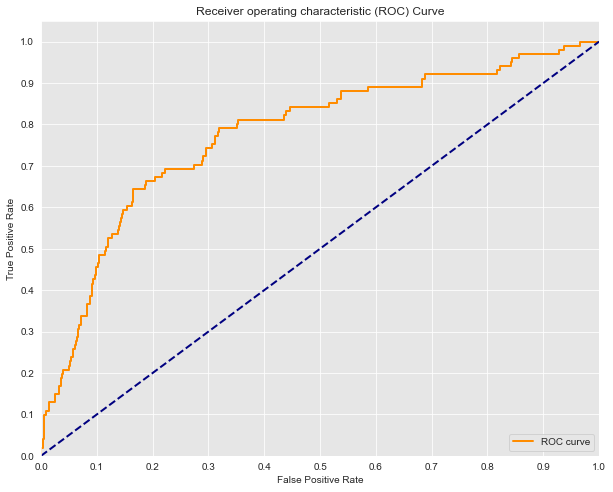

In [19]:
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

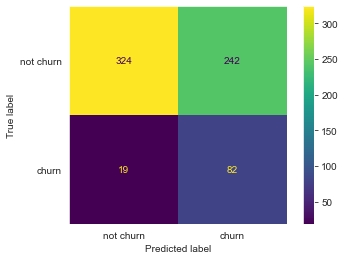

In [20]:
# Plot confusion matrix of the test set
plot_confusion_matrix(logreg, X_test_sc, y_test,
                      display_labels=["not churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

In [23]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_tr_sc, y_train) 


# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2284
0    2284
Name: churn, dtype: int64


In [61]:
logreg_SMOTE = LogisticRegression(C=0.1, solver ='liblinear')

logreg_SMOTE.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=0.1, solver='liblinear')

In [62]:
# Predict
y_hat_test = logreg_SMOTE.predict(X_test_sc)

y_score_sm = logreg_SMOTE.fit(X_train_resampled, y_train_resampled).decision_function(X_test_sc)


In [63]:
y_score_sm = logreg_SMOTE.fit(X_train_resampled, y_train_resampled).predict_proba(X_train_resampled)[:,1]

In [110]:
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_train_resampled, y_score_sm)

print('AUC: {}'.format(auc(fpr_sm, tpr_sm)))

AUC: 0.7755481672550385


In [65]:
recall_score(y_train_resampled, logreg_SMOTE.fit(X_train_resampled, y_train_resampled).predict(X_train_resampled))

0.7154115586690017

In [119]:
C_param_range = [0.05, 0.01, 1, 10, 100, 1000, 10000, 1e7]
names = [0.05, 0.01, 1, 10, 100, 1000, 10000, 1e7]

for n, c in enumerate(C_param_range):
    logreg_SMOTE = LogisticRegression(penalty='l1', C=c, solver ='liblinear')

    logreg_SMOTE.fit(X_train_resampled, y_train_resampled)
    
    # Predict
    y_hat_test = logreg_SMOTE.predict(X_test_sc)

    y_score_sm = logreg_SMOTE.fit(X_train_resampled, y_train_resampled).predict_proba(X_train_resampled)[:,1]
    
    rc_sm = recall_score(y_train_resampled, logreg_SMOTE.fit(X_train_resampled, y_train_resampled).predict(X_train_resampled))

    # False positive rate and true positive rate
    fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_train_resampled, y_score_sm)

    # Seaborn's beautiful styling
    #sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    # Print AUC
    print('AUC: {}'.format(auc(fpr_sm, tpr_sm)))
    print('Recall score {}: {}'.format(names[n], rc_sm))
    print('-------------------------------------------------------')

AUC: 0.7754826080155562
Recall score 0.05: 0.718476357267951
-------------------------------------------------------
AUC: 0.7715461782413868
Recall score 0.01: 0.7543782837127846
-------------------------------------------------------
AUC: 0.77557174557801
Recall score 1: 0.712784588441331
-------------------------------------------------------
AUC: 0.7755552599212983
Recall score 10: 0.7123467600700525
-------------------------------------------------------
AUC: 0.7755592854886348
Recall score 100: 0.7123467600700525
-------------------------------------------------------
AUC: 0.7755627359749234
Recall score 1000: 0.712784588441331
-------------------------------------------------------
AUC: 0.7755654196864812
Recall score 10000: 0.7123467600700525
-------------------------------------------------------
AUC: 0.7755659947675293
Recall score 10000000.0: 0.7123467600700525
-------------------------------------------------------


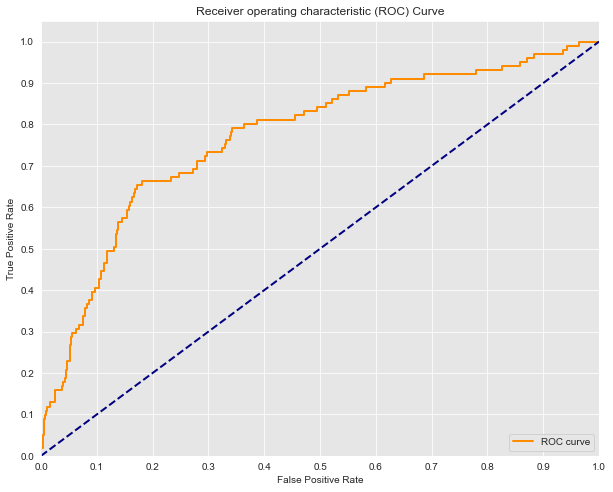

In [42]:
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_sm, tpr_sm, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/10.0 for i in range(11)])
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

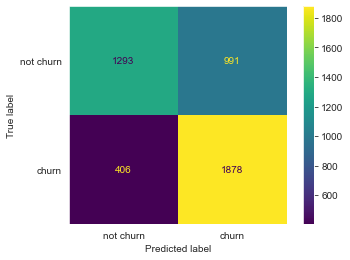

In [48]:
# Plot confusion matrix of the test set
plot_confusion_matrix(logreg_SMOTE, X_train_resampled, y_train_resampled,
                      display_labels=["not churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

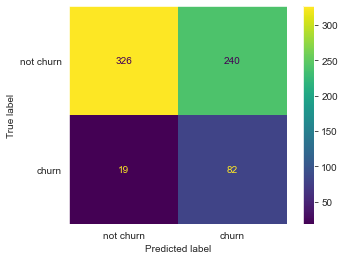

In [43]:
# Plot confusion matrix of the test set
plot_confusion_matrix(logreg_SMOTE, X_test_sc, y_test,
                      display_labels=["not churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

# Pipeline

In [140]:

#pipeline2 = Pipeline([('smote', smote)])
pipeline = make_pipeline(StandardScaler(), smote, LogisticRegression(penalty='l1', C=.01, solver ='liblinear'))
pipeline
#pipeline2

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [146]:
scores = cross_val_score(pipeline, X_train_num, y_train, cv=3, scoring='f1')
scores

array([0.39157895, 0.38003839, 0.36659878])

In [123]:
pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [124]:
pipeline.score(X_train_resampled, y_train_resampled)

0.7173817863397548